## KNN
This is actually a lazy algoritm, it won't learn anything\
works based on shortest distance or manhatten distance\
classify the classes

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

### EDA

### Univariate Analysis

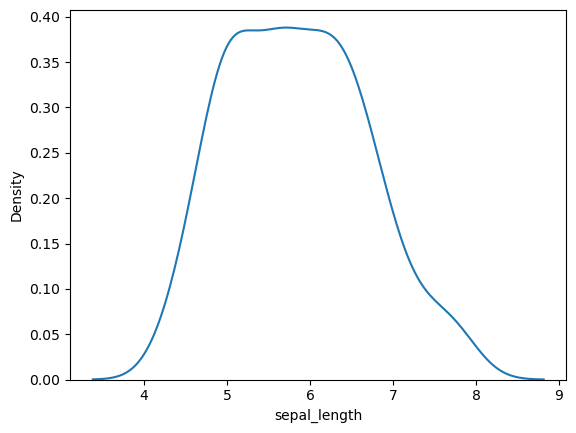

In [12]:
sns.kdeplot(df.sepal_length)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


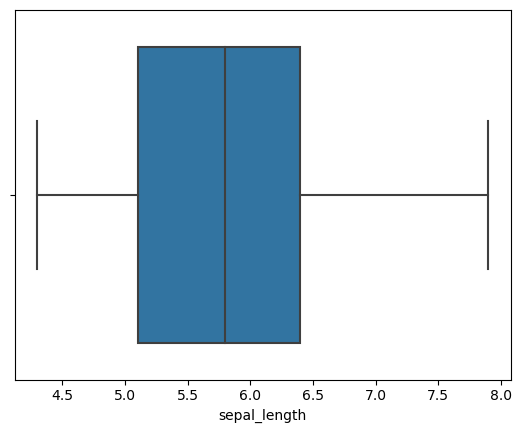

In [13]:
sns.boxplot(df.sepal_length)
plt.show()

## Bivariate Analysis

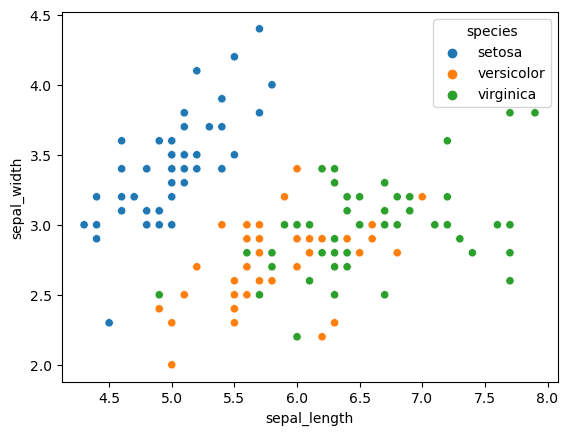

In [14]:
sns.scatterplot(x=df.sepal_length,y=df.sepal_width,hue=df.species)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


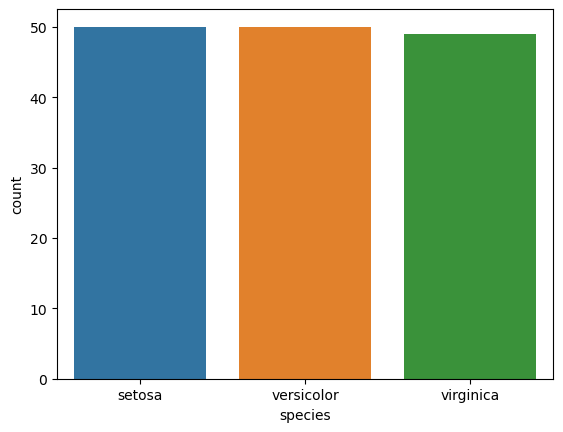

In [15]:
sns.countplot(df.species)
plt.show()

In [16]:
df.species.value_counts()# no imbalanced data 

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

## Multivariate Analysis

In [17]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


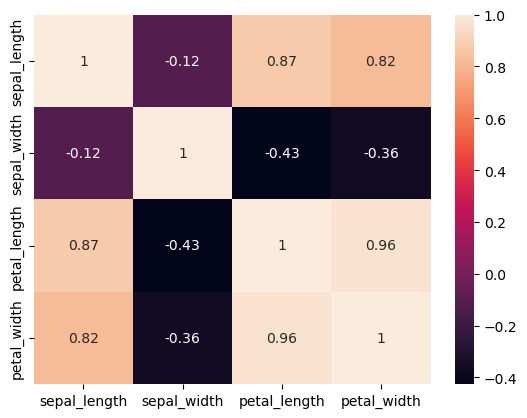

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

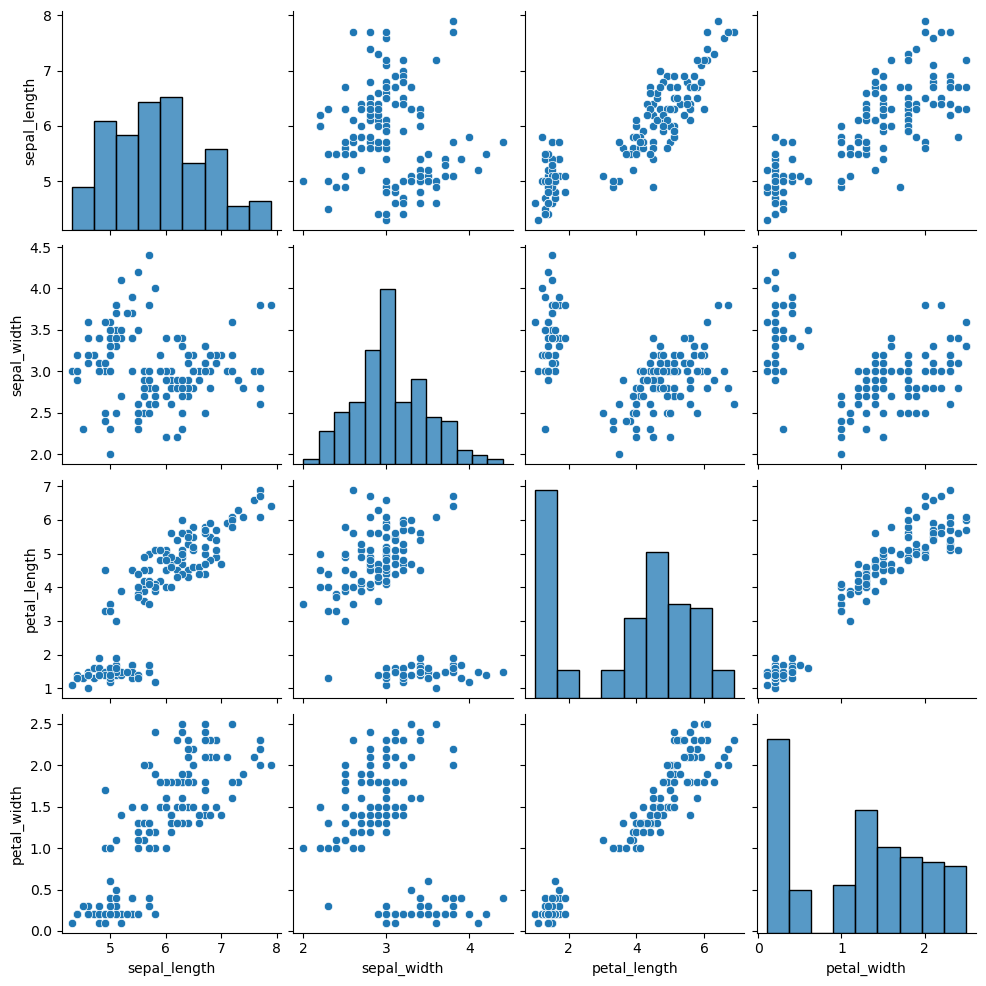

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
# Handle data challenges

## Categorical Handling

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
ca=LabelEncoder()

In [23]:
df.species=ca.fit_transform(df.species)

In [24]:
df.head(71)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
66,5.6,3.0,4.5,1.5,1
67,5.8,2.7,4.1,1.0,1
68,6.2,2.2,4.5,1.5,1
69,5.6,2.5,3.9,1.1,1


In [25]:
df.species.unique()

array([0, 1, 2])

## split the data

In [26]:
x=df.drop('species',axis=1)

In [27]:
y=df[['species']]

## Train test and split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=80)

In [30]:
x_train.shape

(119, 4)

In [31]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
70,5.9,3.2,4.8,1.8
83,6.0,2.7,5.1,1.6
99,5.7,2.8,4.1,1.3
139,6.9,3.1,5.4,2.1
71,6.1,2.8,4.0,1.3


In [32]:
y_train.shape

(119, 1)

## K-NN

In [33]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
#interpretable algorithm

In [34]:
knn=KNeighborsClassifier(n_neighbors=7)# odd numbers

In [35]:
knn.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [36]:
pred=knn.predict(x_test)
pred

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 1, 0])

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
accuracy_score(y_test,pred)

0.9666666666666667

In [39]:
confusion_matrix(y_test,pred)

array([[14,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  5]], dtype=int64)

In [40]:
print("training accuracy",knn.score(x_train,y_train))
print("testing accuracy",knn.score(x_test,y_test))

training accuracy 0.9747899159663865
testing accuracy 0.9666666666666667


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

## Cross Validation

In [41]:
x_trainf,x_test_cv,y_trainf,y_test_cv=train_test_split(x_train,y_train,train_size=0.8,random_state=100)

In [43]:
x_trainf.shape

(95, 4)

In [54]:
train_error=[]
for i in range(1,20,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    KNN=knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    train_error.append(1-accuracy_score(y_test,pred))

In [55]:
train_error

[0.033333333333333326,
 0.0,
 0.0,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326]

## Testing

In [115]:
knn.predict([[5.9,3.2,4.8,1.8]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [116]:
knn.predict([[25,57,12,45]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2])

## Naive Bayes
conditional probability\
p(a/b),only one or two samples\
bayes theorem we can no.samples, no.observations,no.datapoints\
for accurate results we are using Naive bayes


Assumptions:\
conditionally independant each other

Data challenges:
outliers--> effected\
missing --> handle\
imbalance--> handle

It is interpretability algorithm

Time and complexity:
it will less time comparing knn,it takes less storage comparatively with knn

In [118]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB

In [119]:
nb=GaussianNB()

In [120]:
nb.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [123]:
predi=nb.predict(x_test)
predi

array([0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 1, 0])

In [124]:
accuracy_score(y_test,predi)

0.9666666666666667

### Testing

In [125]:
nb.predict([[5.9,3.2,4.8,1.8]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([2])